In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


In [18]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [19]:
movies_metadata = catalog.load("movies_metadata")

print(movies_metadata.head())

[11/01/25 11:23:28] INFO     Loading data from movies_metadata (CSVDataset)...                 ]8;id=175051;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=96343;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

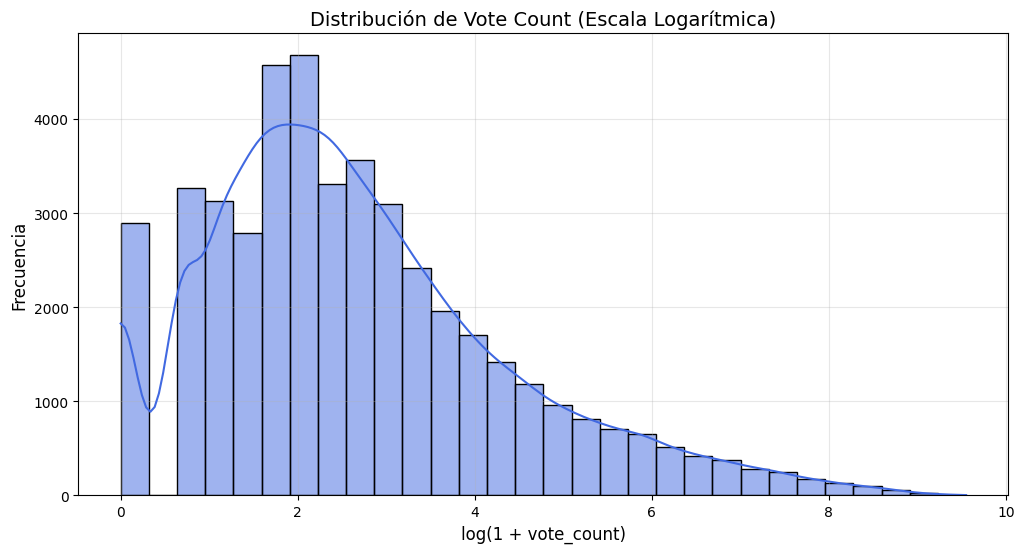

Estadísticas de vote_count:
count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64


In [20]:
## Distribución de la cantidad de votos por película
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Usar el DataFrame que cargaste desde el catalog
data = movies_metadata

# Visualizar la distribución de vote_count
plt.figure(figsize=(12, 6))

# Usamos logaritmo para mejorar la visualización
sns.histplot(np.log1p(data['vote_count']), bins=30, color='royalblue', kde=True)

plt.title('Distribución de Vote Count (Escala Logarítmica)', fontsize=14)
plt.xlabel('log(1 + vote_count)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Mostrar estadísticas
print("Estadísticas de vote_count:")
print(data['vote_count'].describe())

## este gráfico visualiza cómo se distribuyen los votos de las películas
## y destaca que la mayoría recibe pocos votos, mientras que unas pocas reciben muchos




In [21]:
from sklearn.model_selection import train_test_split

# Supongamos que estas son tus variables predictoras
X = data[['budget', 'popularity', 'runtime']]  
y = data['vote_count']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Cargar dataset 
movies_metadata = catalog.load("movies_metadata")

# Convertir columnas a numéricas
movies_metadata['revenue'] = pd.to_numeric(movies_metadata['revenue'], errors='coerce')
movies_metadata['vote_count'] = pd.to_numeric(movies_metadata['vote_count'], errors='coerce')

# Eliminar filas con valores nulos en las columnas que usaremos
movies_metadata = movies_metadata.dropna(subset=['revenue', 'vote_count'])

# Definir variables
X = movies_metadata[['revenue']] 
y = movies_metadata['vote_count']  
# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Crear y entrenar el modelo 
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones sobre el conjunto de test
y_pred = model.predict(X_test)

# Calcular métricas de desempeño
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"{' Regresión Lineal Simple: vote_count ~ revenue ':=^60}")
print(f"MSE  : {mse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")
print("="*60)

# Mostrar ecuación de regresión
coef = model.coef_[0]
intercept = model.intercept_
print(f"Ecuación: vote_count = {coef:.4e} * revenue + {intercept:.4f}")





[11/01/25 11:23:40] INFO     Loading data from movies_metadata (CSVDataset)...                 ]8;id=331285;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=342840;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

====== Regresión Lineal Simple: vote_count ~ revenue =======
MSE  : 82425.3937
MAE  : 83.2301
RMSE : 287.0982
R²   : 0.6431
Ecuación: vote_count = 6.1658e-06 * revenue + 40.5443


In [23]:
# Seleccionar solo columnas numéricas
numeric_cols = movies_metadata.select_dtypes(include=['float64', 'int64'])

# Calcular correlación con vote_count
correlation = numeric_cols.corr()['vote_count'].sort_values(ascending=False)
print(correlation)


vote_count      1.000000
revenue         0.812022
vote_average    0.123607
runtime         0.113539
Name: vote_count, dtype: float64


GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Definir el modelo base
lr = LinearRegression()

# Definir el espacio de hiperparámetros
param_grid = {
    'fit_intercept': [True, False]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error')

# Ajustar el GridSearchCV con tus datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar resultados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación (neg MSE):", grid_search.best_score_)

# Usar el mejor modelo
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Calcular métricas con el mejor modelo
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mse_best ** 0.5
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"\n{' Resultados con el Mejor Modelo ':=^60}")
print(f"MSE  : {mse_best:.4f}")
print(f"MAE  : {mae_best:.4f}")
print(f"RMSE : {rmse_best:.4f}")
print(f"R²   : {r2_best:.4f}")
print("="*60)

# Mostrar ecuación de regresión del mejor modelo
coef_best = best_model.coef_[0]
intercept_best = best_model.intercept_
print(f"Ecuación: vote_count = {coef_best:.4e} * revenue + {intercept_best:.4f}")


Mejores hiperparámetros encontrados: {'fit_intercept': True}
Mejor puntuación (neg MSE): -82725.7666825521

============== Resultados con el Mejor Modelo ==============
MSE  : 82425.3937
MAE  : 83.2301
RMSE : 287.0982
R²   : 0.6431
Ecuación: vote_count = 6.1658e-06 * revenue + 40.5443


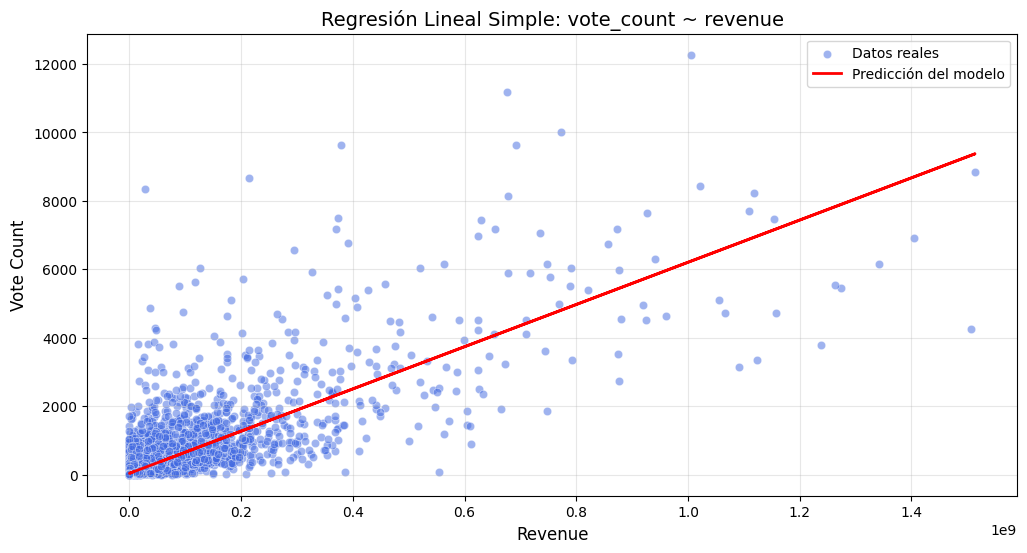

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear gráfico de dispersión 
plt.figure(figsize=(12,6))
sns.scatterplot(x=X_test['revenue'], y=y_test, color='royalblue', alpha=0.5, label='Datos reales')

# Graficar la línea de regresión
plt.plot(X_test['revenue'], y_pred, color='red', linewidth=2, label='Predicción del modelo')

plt.title('Regresión Lineal Simple: vote_count ~ revenue', fontsize=14)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Vote Count', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Conclusiones

Evaluación General
R² = 0.6431 → Modelo con ajuste moderado.

Relación Identificada
vote_count = 6.1658e-06 * revenue + 40.5443
Cada incremento de 1 en el revenue aumenta el vote_count en aproximadamente 0.000006 puntos.
Relación positiva entre ingresos de la película y cantidad de votos, aunque el efecto por unidad es muy pequeño debido a la escala del revenue.

Precisión del Modelo
Error promedio (MAE): 83.23 votos
Error típico (RMSE): 287.10 votos
Errores moderados considerando la gran dispersión en vote_count (mín: 0, máximo: 14075)

Interpretación
El revenue es un predictor útil del número de votos, pero no explica toda la variabilidad.
Aún queda un 35.69% de variabilidad no explicada.

Resumen
Modelo útil para identificar tendencias generales entre ingresos y cantidad de votos, pero es mejorable incluyendo más variables.